In [ ]:
# Nama    : Taufik Kurahman Sasmita
# Nim     : 1103200008
# Lecture : Tugas UTS
# Model   : Random Fores
# Dataset : https://www.kaggle.com/datasets/parisrohan/credit-score-classification



---


# **Import Liblary yang akan di pakai atau di butuhkan**

---






In [79]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



---


# **Menghubungkan Gcollab dengan Gdrive**


---



In [78]:
# Menghubungkan Gcollab dengan Gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).




---


 #**Membaca dan Menampilkan data dari Path yang sudah ada di Gdrive**


---



In [82]:
# Baca file .csv dari GDrive
train = pd.read_csv('/content/gdrive/MyDrive/Dataset/train.csv', dtype={'Column26': str})

# Tampilkan baris dari dataframe 'train'
train.head()

<ipython-input-82-fee8c25ff1a1>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/content/gdrive/MyDrive/Dataset/train.csv', dtype={'Column26': str})


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good




---


# **Mengekstrak angka dari nilai-nilai dan mengonversikan kepada bilangan bulat**


---



In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Pembersihan data

In [84]:
train['Age'] = train['Age'].fillna('0').str.extract('(\d+)').astype(float).astype(int)
train['Num_of_Loan'] = train['Num_of_Loan'].fillna('0').str.extract('(\d+)').astype(float).astype(int)
train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].fillna('0').str.extract('(\d+)').astype(float).astype(int)

membersihkan dan memformat data dalam beberapa kolom tertentu dalam DataFrame

In [85]:
train['Annual_Income'] = train['Annual_Income'].str.replace(r'[^0-9.]', '', regex=True)
train['Annual_Income'] = train['Annual_Income'].astype(float)

membersihkan kolom 'Annual_Income' dari karakter non-numerik dan mengonversi nilainya menjadi tipe data float.

In [86]:
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].replace('_', np.nan)
train['Changed_Credit_Limit'] = pd.to_numeric(train['Changed_Credit_Limit'], errors='coerce')
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].fillna(0)

membersihkan dan memformat kolom 'Changed_Credit_Limit' dalam DataFrame

In [87]:
train['Outstanding_Debt'] = train['Outstanding_Debt'].astype(str)
train['Outstanding_Debt'] = train['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True)
train['Outstanding_Debt'] = pd.to_numeric(train['Outstanding_Debt'], errors='coerce')
train['Outstanding_Debt'] = train['Outstanding_Debt'].fillna(0)

membersihkan dan memformat kolom 'Outstanding_Debt' dalam DataFrame

In [88]:
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].astype(str)
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].replace('', '0')
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].str.replace(r'[^0-9.]', '')
train['Amount_invested_monthly'] = pd.to_numeric(train['Amount_invested_monthly'], errors='coerce')
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].fillna(0)

membersihkan dan memformat kolom 'Amount_invested_mounthly' dalam DataFrame

In [89]:
train['Monthly_Balance'] = train['Monthly_Balance'].astype(str)
train['Monthly_Balance'] = train['Monthly_Balance'].str.replace(r'[^0-9.-]+', '')
train['Monthly_Balance'] = pd.to_numeric(train['Monthly_Balance'], errors='coerce')
train['Monthly_Balance'] = train['Monthly_Balance'].fillna(0)

membersihkan dan memformat kolom 'Monthly_Balance' dalam DataFrame

In [90]:
def parse_years_and_months(age):
    if isinstance(age, str):
        age_parts = age.split(' Years and ')
        years = int(age_parts[0]) if 'Years' in age else 0
        months_str = age_parts[1].split(' Months')[0] if 'Months' in age_parts[1] else '0'
        months = int(months_str)
        total_months = years * 12 + months
        return total_months
    else:
        return 0

train['Credit_History_Age_Months'] = train['Credit_History_Age'].apply(parse_years_and_months)

mendefinisikan sebuah fungsi bernama parse_years_and_months(age) yang bertujuan untuk mengonversi data usia kredit dalam format string "X Years and Y Months" menjadi jumlah bulan.



---


# Memproses data dan Duplikat data pada DataFrame


---



In [91]:
# Mencari baris duplikat dalam DataFrame
duplicates = train[train.duplicated()]

# Menghitung jumlah baris duplikat yang ada dalam DataFrame
num_duplicates = duplicates.shape[0]

# Pengujian kondisional
if num_duplicates == 0: #kondisional statement yang memeriksa apakah jumlah duplikat adalah 0 atau tidak.
    print("Tidak ada duplikat") #Jika tidak ada duplikat yang ditemukan, pernyataan ini akan dicetak, memberi tahu pengguna bahwa tidak ada duplikat dalam DataFrame
else:
    print("Masih ada", num_duplicates, "duplikat.") #Jika masih ada duplikat yang ditemukan, pernyataan ini akan dicetak, memberi tahu pengguna bahwa masih ada sejumlah duplikat yang ditemukan dalam DataFrame

Tidak ada duplikat


Membersihkan data

In [92]:
# Pilih kolom tertentu
selected_columns_train = train[['Num_Bank_Accounts', 'Interest_Rate', 'Annual_Income', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Total_EMI_per_month', 'Num_of_Loan', 'Num_Credit_Card']]

# Tentukan persentil untuk setiap kolom yang dipilih
percentile_threshold = 0.98
percentiles = selected_columns_train.quantile(percentile_threshold)

# Hapus perulangan nilai untuk setiap kolom yang masih diatas persentil yang ditentukan sebelumnya
for column in selected_columns_train.columns:
    train = train[train[column] <= percentiles[column]]

In [36]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,119.509700,684.757313,14.000000,25.000000,34.000000,42.000000,8698.000000
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Num_of_Loan,100000.0,10.761960,61.789933,0.000000,2.000000,3.000000,6.000000,1496.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,100000.0,28.779410,218.114813,0.000000,8.000000,13.000000,18.000000,4397.000000
Changed_Credit_Limit,100000.0,10.171791,6.880628,-6.490000,4.970000,9.250000,14.660000,36.970000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000


In [93]:
# menghapus baris dari DataFrame, di mana nilai dalam kolom 'Payment_Behaviour' adalah '!@9#%8'.
train = train[train['Payment_Behaviour'] != '!@9#%8']

# menghapus baris dari DataFrame train di mana nilai dalam kolom 'Occupation' adalah '' (enam garis bawah). Prinsipnya sama dengan langkah pertama, di mana kita menggunakan filter yang dibuat oleh ekspresi
train = train[train['Occupation'] != '_______']

# mencetak nilai unik yang ada dalam kolom 'Occupation' dari DataFrame
print(train['Occupation'].unique())


['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']


In [94]:
# Buat dataframe baru pada Credit_Mix yang tidak ada nilai '_'
train = train[train['Credit_Mix'] != '_']

# Cetak nilai unik pada kolom Credit_Mix
print(train['Credit_Mix'].unique())

['Good' 'Standard' 'Bad']


1. train = train[train['Credit_Mix'] != '_']: Baris ini menghasilkan sebuah mask atau filter yang akan menghasilkan nilai True untuk setiap baris di mana nilai dalam kolom 'Credit_Mix' tidak sama dengan ''. Kemudian, baris-baris yang sesuai dengan kondisi ini diambil dari DataFrame train dengan menggunakan slicing, dan DataFrame tersebut diperbarui dengan baris-baru tersebut. Dengan kata lain, baris-baris di mana 'Credit_Mix' memiliki nilai '' (garis bawah) akan dihapus dari DataFrame train.
2. print(train['Credit_Mix'].unique()): Setelah melakukan pemfilteran, baris-baris yang memiliki nilai '' (garis bawah) telah dihapus dari DataFrame train. Baris ini mencetak nilai unik yang tersisa dalam kolom 'Credit_Mix' setelah membersihkan data. Ini membantu dalam memverifikasi apakah perubahan yang dilakukan pada kolom 'Credit_Mix' berhasil menghilangkan nilai '' dari data dan hanya menyisakan nilai unik yang valid.

Nilai Negativ

In [95]:
# Seleksi kolom untuk filtering
selected_columns = ['Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Bank_Accounts']

# Lakukan perulangan untuk selain kurang dari 0 dihapus dari dataframe
for column in selected_columns:
    train = train[train[column] >= 0]

1. selected_columns = ['Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Bank_Accounts']: Baris ini mendefinisikan daftar selected_columns yang berisi nama-nama kolom yang ingin diproses. Kolom-kolom ini adalah 'Delay_from_due_date', 'Changed_Credit_Limit', dan 'Num_Bank_Accounts'.
2. for column in selected_columns:: Baris ini memulai sebuah loop yang akan mengiterasi melalui setiap elemen dalam daftar selected_columns. Dalam setiap iterasi, nilai column akan merepresentasikan nama kolom yang sedang diproses.
3. train = train[train[column] >= 0]: Baris ini bertujuan untuk membersihkan data dalam DataFrame train dari nilai yang tidak diinginkan dalam kolom-kolom yang dipilih. Di setiap iterasi, nilai-nilai yang lebih kecil dari 0 dalam kolom yang sedang diproses akan dihapus. Dengan menggunakan filter train[column] >= 0, kita menghasilkan sebuah mask atau filter yang akan menghasilkan nilai True untuk setiap baris di mana nilai dalam kolom yang sedang diproses lebih besar dari atau sama dengan 0. Kemudian, baris-baris yang sesuai dengan kondisi ini diambil dari DataFrame train dengan menggunakan slicing, dan DataFrame tersebut diperbarui dengan baris-baru tersebut. Dengan kata lain, baris-baris di mana nilai dalam kolom yang dipilih kurang dari 0 akan dihapus dari DataFrame train. Ini membantu memastikan bahwa hanya nilai yang non-negatif yang tetap ada dalam kolom-kolom yang dipilih.

In [96]:
# Drop daftar yang diinginkan
columns_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Credit_History_Age','Monthly_Inhand_Salary', 'Type_of_Loan']

# Drop columns tersebut
train.drop(columns=columns_to_drop, inplace=True)


Nilai Missing Values

In [97]:
# Periksa total jumlah data yang kosong dalam dataframe
total_missing_values = train.isnull().sum().sum()

# Lakukan pengujian kondisional
if total_missing_values == 0:
    print("Tidak ada data yang kosong")
else:
    print("Jumlah data yang kosong :", total_missing_values)

Tidak ada data yang kosong




---


# **Feature Engineering**


---



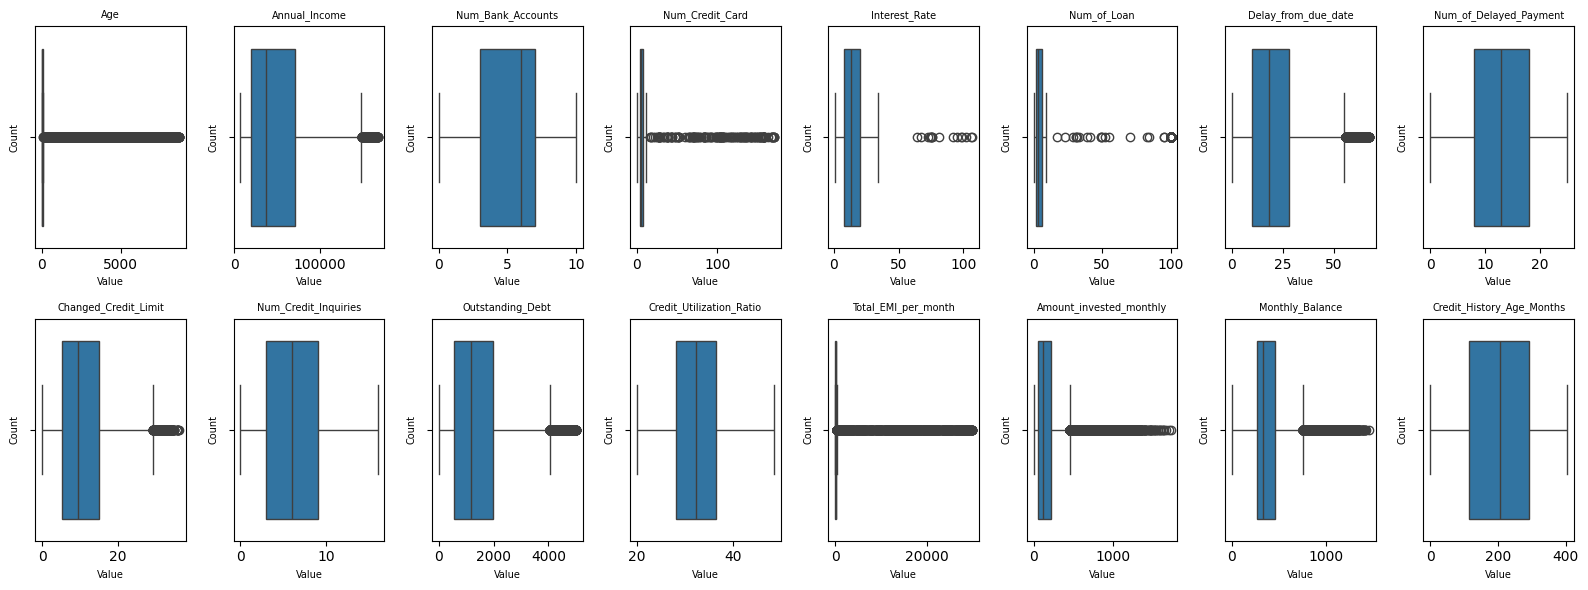

In [98]:
# Identifikasi jenis-jenis tipe data dan dimasukkan kedalam numerik kolom
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns

# Jumlah kolom yang ingin ditampilkan
num_columns = 8

# Jumlah baris yang ditampilkan sesuai dengan jumlah kolom yang ditentukan
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns

# Ukuran subplot
fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 6))

axes = axes.flatten()

# Loop untuk membuat boxplot
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=train[column], ax=axes[i])
    axes[i].set_title(column, fontsize=7)
    axes[i].set_xlabel('Value', fontsize=7)
    axes[i].set_ylabel('Count', fontsize=7)

# menyembunyikan subplot yang tidak digunakan
for j in range(len(numeric_columns), num_columns*num_rows):
    axes[j].axis('off')

# Menata ulang letak plot
plt.tight_layout()

# Menampilkan Plot
plt.show()

membuat box plot untuk setiap kolom numerik dalam DataFrame train, dengan tujuan untuk memvisualisasikan distribusi dan mengetahui adanya outlier dalam setiap kolom numerik tersebut

**Scalling**

In [99]:
# Convert kolom 'Age' ke tipe data numerik jika belum
train['Age'] = pd.to_numeric(train['Age'], errors='coerce')

# Tune scale pada tiap kolom
train = train[train['Age'] < 60]
train = train[train['Num_Credit_Card'] <= 10]
train = train[train['Interest_Rate'] <= 50]
train = train[train['Num_of_Loan'] <= 12]
train = train[train['Num_Bank_Accounts'] <= 10]
train = train[train['Delay_from_due_date'] <= 60]
train = train[train['Changed_Credit_Limit'] <= 30]
train = train[train['Num_Credit_Inquiries'] <= 12]
train = train[train['Total_EMI_per_month'] <= 200]
train = train[train['Outstanding_Debt'] <= 1500]


Tujuan dari perintah-perintah ini adalah untuk menghilangkan outlier atau nilai-nilai ekstrim yang mungkin tidak representatif atau tidak realistis, sehingga memperbaiki kualitas dan konsistensi data sebelum dilakukan analisis lebih lanjut atau pemodelan.

**Encoding**

In [100]:
#Label Encoder
categories = ['Poor', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

train['Credit_Score_Encoded'] = encoder.fit_transform(train[['Credit_Score']])

# Encoding Occupation
label_encoder = LabelEncoder()
train['Occupation_Encoded'] = label_encoder.fit_transform(train['Occupation'])

#Ordinal Encoder
categories = ['Bad', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

train['Credit_Mix_Encoded'] = encoder.fit_transform(train[['Credit_Mix']])

categories_payment_behaviour = [
    'Low_spent_Small_value_payments',
    'Low_spent_Medium_value_payments',
    'Low_spent_Large_value_payments',
    'High_spent_Small_value_payments',
    'High_spent_Medium_value_payments',
    'High_spent_Large_value_payments'
]

encoder_payment_behaviour = OrdinalEncoder(categories=[categories_payment_behaviour])

train['Payment_Behaviour_Encoded'] = encoder_payment_behaviour.fit_transform(train[['Payment_Behaviour']])


#Dropping Unencoded Columns
columns_to_drop = [ 'Payment_Behaviour', 'Credit_Mix', 'Occupation','Credit_Score']
train.drop(columns=columns_to_drop, inplace=True)

Perintah-perintah tersebut memiliki tujuan untuk melakukan encoding terhadap beberapa kolom kategorikal dalam DataFrame train sehingga dapat digunakan dalam analisis atau pemodelan yang melibatkan algoritma pembelajaran mesin.

1. Encoding kategori 'Credit_Score' menggunakan Ordinal Encoder:
*   Kategori 'Poor', 'Standard', dan 'Good' dalam kolom 'Credit_Score' diubah menjadi nilai numerik menggunakan Ordinal Encoder dari library Scikit-learn. Ini memungkinkan representasi yang lebih mudah diproses oleh model.


2. Encoding kolom 'Occupation' menggunakan Label Encoder:
*   Nilai-nilai dalam kolom 'Occupation' diubah menjadi nilai numerik menggunakan Label Encoder dari Scikit-learn. Ini dilakukan untuk mengubah label teks menjadi nilai numerik sehingga dapat digunakan dalam analisis lebih lanjut.
3. Encoding kategori 'Credit_Mix' menggunakan Ordinal Encoder:
*   Kategori 'Bad', 'Standard', dan 'Good' dalam kolom 'Credit_Mix' diubah menjadi nilai numerik menggunakan Ordinal Encoder. Pendekatan ini mirip dengan encoding kategori 'Credit_Score'.
4. Encoding kategori 'Payment_Behaviour' menggunakan Ordinal Encoder:
*   Kategori yang berbeda dalam kolom 'Payment_Behaviour' diubah menjadi nilai numerik menggunakan Ordinal Encoder. Ini memungkinkan representasi ordinal yang konsisten untuk kategori-kategori dalam kolom tersebut.
5. Menghapus kolom-kolom asli yang telah diencode:
*   Setelah encoding selesai, kolom-kolom asli yang telah diencode, yaitu 'Payment_Behaviour', 'Credit_Mix', 'Occupation', dan 'Credit_Score', dihapus dari DataFrame train karena sudah tidak diperlukan lagi dalam bentuk aslinya setelah encoding dilakukan. Ini membantu mengurangi dimensi data dan mempersiapkannya untuk analisis atau pemodelan selanjutnya.

**New Features**

In [101]:
# menghitung total jumlah (Bank Accounts + Credit Cards)
train['Total_Num_Accounts'] = train['Num_Bank_Accounts'] + train['Num_Credit_Card']

# menghitung total jumlah hutang per akun

train['Debt_Per_Account'] = train['Outstanding_Debt'] / train['Total_Num_Accounts']

# Menghitung perbandingan hutang dan pemasukan

train['Debt_to_Income_Ratio'] = train['Outstanding_Debt'] / train['Annual_Income']

# Menghitung total jumlah pembayaran yang telat per akun

train['Delayed_Payments_Per_Account'] = train['Num_of_Delayed_Payment'] / train['Total_Num_Accounts']

# Menghitung pengeluaran bulanan (EMI + Investasi bulanan)

train['Total_Monthly_Expenses'] = train['Total_EMI_per_month'] + train['Amount_invested_monthly']


**Mutual Information Score (MI Score)**

In [102]:
# Identifikasi kolom-kolom kategorikal dalam DataFrame 'train'
categorical_columns = train.select_dtypes(include=['object']).columns

# Buat salinan data 'train' untuk proses encoding
data_encoded = train.copy()

# Buat encoder Ordinal
encoder = OrdinalEncoder()

# Lakukan encoding pada kolom-kolom kategorikal menggunakan encoder Ordinal
data_encoded[categorical_columns] = encoder.fit_transform(data_encoded[categorical_columns])

# Pisahkan target (y) dan fitur-fitur (X) dari data yang telah diencode
y = data_encoded['Credit_Score_Encoded']
X = data_encoded.drop(columns=['Credit_Score_Encoded'])

# Hitung skor informasi mutual antara setiap fitur dalam X dan target y
mi_scores = mutual_info_classif(X, y)

# Cetak skor informasi mutual untuk setiap fitur
for i, score in enumerate(mi_scores):
    print(f"Feature '{X.columns[i]}': Mutual Information Score = {score}")

Feature 'Age': Mutual Information Score = 0.006435292370012835
Feature 'Annual_Income': Mutual Information Score = 0.42764989547556254
Feature 'Num_Bank_Accounts': Mutual Information Score = 0.05884401881645096
Feature 'Num_Credit_Card': Mutual Information Score = 0.07182845192542153
Feature 'Interest_Rate': Mutual Information Score = 0.1016424068235442
Feature 'Num_of_Loan': Mutual Information Score = 0.021322003520307664
Feature 'Delay_from_due_date': Mutual Information Score = 0.06373458236644214
Feature 'Num_of_Delayed_Payment': Mutual Information Score = 0.05128409861966654
Feature 'Changed_Credit_Limit': Mutual Information Score = 0.09977018534582527
Feature 'Num_Credit_Inquiries': Mutual Information Score = 0.03168867647380025
Feature 'Outstanding_Debt': Mutual Information Score = 0.4305911908845892
Feature 'Credit_Utilization_Ratio': Mutual Information Score = 0.0008940600062685711
Feature 'Payment_of_Min_Amount': Mutual Information Score = 0.07189804705042935
Feature 'Total_EM

In [103]:
# Urutkan skor informasi mutual dan nama fitur secara terbalik
sorted_mi_scores = sorted(zip(X.columns, mi_scores), key=lambda x: x[1], reverse=True)

# Dapatkan nama fitur yang sudah diurutkan
sorted_columns = [x[0] for x in sorted_mi_scores]

# Dapatkan skor informasi mutual yang sudah diurutkan
sorted_scores = [x[1] for x in sorted_mi_scores]

# Skala warna yang digunakan untuk plot
colorscale = 'Viridis'

# Buat plot batang dengan menggunakan skor informasi mutual dan nama fitur
fig = go.Figure(data=[go.Bar(x=sorted_columns, y=sorted_scores, marker=dict(color=sorted_scores, colorbar=dict(title='Skor Informasi Mutual', len=0.5, y=0.2)))])

# Sesuaikan tata letak plot dan memberi judul pada sumbu-sumbunya
fig.update_layout(title='Skor Informasi Mutual untuk Setiap Fitur',
                  xaxis_title='Fitur',
                  yaxis_title='Skor Informasi Mutual')

# Menampilkan plot
fig.show()

# **Model Machine Learning**

In [104]:
# Siapkan dataframe untuk latih pada variabel y pada kolom Credit_Score_Encoded
y = train['Credit_Score_Encoded']

# Siapkan dataframe untuk latih pada variabel X pada kolom yang ditentukan dibawah
X = train[['Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month',
       'Credit_History_Age_Months', 'Total_Num_Accounts',
       'Debt_Per_Account', 'Debt_to_Income_Ratio', 'Delayed_Payments_Per_Account']]

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

# **Random Fores**

In [105]:
model = RandomForestRegressor(n_estimators=500, bootstrap=True, random_state=77)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=77)

# **Evaluasi Model**

**MSE**

In [106]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.170385667295898


**Acurasi Test**

In [107]:
rf_classifier = RandomForestClassifier(n_estimators=500, bootstrap=True)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

Accuracy on original test set: 0.7957267724182583

Classification report for original test set:
               precision    recall  f1-score   support

         0.0       0.76      0.63      0.69       901
         1.0       0.81      0.88      0.84      3810
         2.0       0.77      0.69      0.73      1467

    accuracy                           0.80      6178
   macro avg       0.78      0.73      0.75      6178
weighted avg       0.79      0.80      0.79      6178



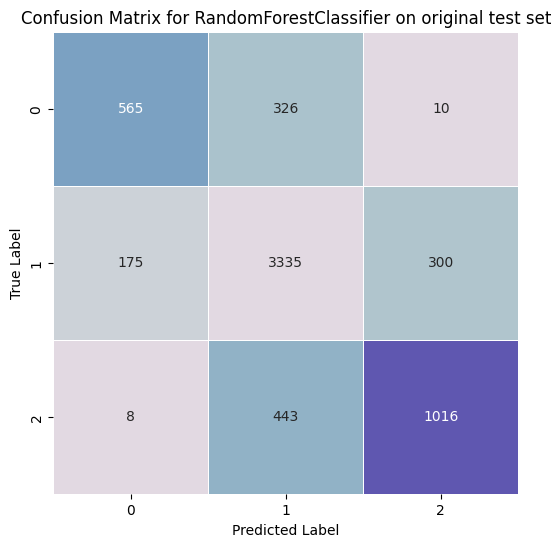

In [108]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on original test set:", accuracy)

matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(matrix, annot=True, cbar=False, cmap='twilight', linewidth=0.5, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for RandomForestClassifier on original test set')

print('\nClassification report for original test set:\n', classification_report(y_test, y_pred))